## Preparation

In [153]:
import pandas as pd
import numpy as np
import pickle
import configparser
from sqlalchemy import create_engine
from sqlalchemy.types import String, Integer
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import statsmodels.formula.api as smf
style.use("fivethirtyeight")

In [198]:
username= 'root'
password= 'Norika1124!'
database= 'Capstone_KAKEN'
appid = 'HhV6SqJ0yYlgkp0a887V'
url = 'mysql+pymysql://' + username + ':' + password + '@localhost:3306/' + database + '?charset=utf8'
engine = create_engine(url)

In [279]:
sql_main = '''
SELECT 
grantaward.awardnumber,
grantaward.startfiscalyear,
grantaward.endfiscalyear,
grantaward.category_niicode,
grantaward.directcost,
grantaward.allocation_niicode
FROM grantaward
WHERE grantaward.category_niicode = 72
OR grantaward.category_niicode = 69
'''
df_main = pd.read_sql_query(sql_main, engine)
df_main.head()

,awardnumber,startfiscalyear,endfiscalyear,category_niicode,directcost,allocation_niicode
0,14310002,2002,2005,69,6800000.0,hojokin
1,14310007,2002,2005,69,13700000.0,hojokin
2,14310011,2002,2005,69,13600000.0,hojokin
3,14310014,2002,2005,69,12900000.0,hojokin
4,14310015,2002,2005,69,6100000.0,hojokin


## Data importing

In [ ]:
df_product = pd.read_csv("/Users/norika_machome/GitHub/Capstone_KAKEN/Data/Parsed_csv/df_product.csv")

In [196]:
df_main_product = pd.read_csv("/Users/norika_machome/GitHub/Capstone_KAKEN/Data/Parsed_csv/df_main_product.csv")

In [195]:
df_main_product

,awardnumber,startfiscalyear,endfiscalyear,category_niicode,directcost,allocation_niicode,len_project,journal_freq_count,jointInt_freq_count,presentation_freq_count,book_freq_count,patent_freq_count,symposium_freq_count,publication_freq_count
0,14310002,2002.0,2005.0,69.0,6800000.0,hojokin,4.0,27.0,0.0,0.0,9.0,0.0,0.0,12.0
1,14310007,2002.0,2005.0,69.0,13700000.0,hojokin,4.0,20.0,0.0,0.0,15.0,0.0,0.0,3.0
2,14310011,2002.0,2005.0,69.0,13600000.0,hojokin,4.0,21.0,0.0,0.0,4.0,0.0,0.0,25.0
3,14310014,2002.0,2005.0,69.0,12900000.0,hojokin,4.0,38.0,0.0,0.0,15.0,0.0,0.0,10.0
4,14310015,2002.0,2005.0,69.0,6100000.0,hojokin,4.0,23.0,0.0,0.0,2.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220031,26520309,2014.0,2016.0,72.0,3700000.0,kikin,3.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
220032,26520310,2014.0,2016.0,72.0,3800000.0,kikin,3.0,5.0,2.0,24.0,1.0,0.0,0.0,0.0
220033,26520311,2014.0,2016.0,72.0,3700000.0,kikin,3.0,10.0,0.0,7.0,1.0,0.0,0.0,0.0
220034,26520312,2014.0,2016.0,72.0,3700000.0,kikin,3.0,3.0,0.0,9.0,1.0,0.0,0.0,0.0


In [156]:
df_main_product.awardnumber.duplicated().any()
df_main_product = df_main_product.set_index('awardnumber')

In [157]:
df_categoryb = df_main_product[df_main_product['category_niicode']==69]
df_categoryc = df_main_product[df_main_product['category_niicode']==72]
df_categoryc = df_categoryc.drop(index="23593141")

In [158]:
df_categoryc.describe()

,startfiscalyear,endfiscalyear,category_niicode,directcost,len_project,journal_freq_count,jointInt_freq_count,presentation_freq_count,book_freq_count,patent_freq_count,symposium_freq_count,publication_freq_count
count,167074.000000,167074.000000,167074.0,1.670740e+05,167074.000000,167074.000000,167074.000000,167074.00000,167074.000000,167074.000000,167074.000000,167074.000000
mean,2014.243539,2016.481380,72.0,3.271673e+06,3.237841,5.788351,0.171116,8.20449,0.789866,0.074476,0.017830,0.000012
std,4.613608,4.830301,0.0,6.317308e+05,0.689959,8.290856,0.927698,11.48826,2.078420,0.538567,0.193566,0.004893
min,2000.000000,2006.000000,72.0,0.000000e+00,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2013.000000,72.0,3.200000e+06,3.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,2017.000000,72.0,3.400000e+06,3.000000,3.000000,0.000000,5.00000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,2021.000000,72.0,3.600000e+06,3.000000,8.000000,0.000000,11.00000,1.000000,0.000000,0.000000,0.000000
max,2021.000000,2026.000000,72.0,6.893796e+06,13.000000,222.000000,33.000000,216.00000,65.000000,30.000000,12.000000,2.000000


In [159]:
df_categoryb.describe()

,startfiscalyear,endfiscalyear,category_niicode,directcost,len_project,journal_freq_count,jointInt_freq_count,presentation_freq_count,book_freq_count,patent_freq_count,symposium_freq_count,publication_freq_count
count,52961.000000,52961.000000,52961.0,5.296100e+04,52961.000000,52961.000000,52961.000000,52961.000000,52961.000000,52961.000000,52961.000000,52961.000000
mean,2012.428787,2014.730160,69.0,1.266497e+07,3.301373,14.563981,0.418006,16.075301,1.913540,0.250562,0.058817,0.213610
std,5.595966,5.822855,0.0,2.394948e+06,0.692302,17.873270,1.592907,21.275258,4.749815,1.199926,0.504807,1.467385
min,2002.000000,2004.000000,69.0,1.200000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,2010.000000,69.0,1.220000e+07,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,2015.000000,69.0,1.330000e+07,3.000000,9.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,2020.000000,69.0,1.410000e+07,4.000000,20.000000,0.000000,22.000000,2.000000,0.000000,0.000000,0.000000
max,2021.000000,2026.000000,69.0,2.220000e+07,7.000000,383.000000,29.000000,310.000000,278.000000,57.000000,54.000000,52.000000


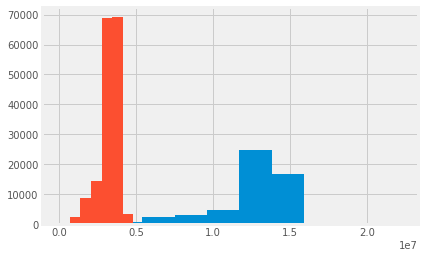

In [187]:
plt.hist(df_categoryb.directcost)
plt.hist(df_categoryc.directcost)
plt.show()

In [185]:
categoryc_sub = df_categoryc[df_categoryc["len_project"]==3]
categoryc_sub = categoryc_sub[categoryc_sub["startfiscalyear"]>=2006]
categoryc_sub = categoryc_sub[categoryc_sub["startfiscalyear"]<=2015]
categoryc_sub.sort_values('startfiscalyear')



categoryc_sub.describe()

,startfiscalyear,endfiscalyear,category_niicode,directcost,len_project,journal_freq_count,jointInt_freq_count,presentation_freq_count,book_freq_count,patent_freq_count,symposium_freq_count,publication_freq_count,kikin_dummy,yearcell
count,62714.000000,62714.000000,62714.0,6.271400e+04,62714.0,62714.000000,62714.000000,62714.000000,62714.000000,62714.000000,62714.000000,62714.0,62714.000000,62714.000000
mean,2011.185860,2013.185860,72.0,3.416839e+06,3.0,7.716682,0.084176,11.571292,1.082454,0.119288,0.011401,0.0,0.592707,0.685860
std,2.575121,2.575121,0.0,6.634903e+05,0.0,8.964900,0.573753,13.157769,2.448320,0.710303,0.151049,0.0,0.491334,2.575121
min,2006.000000,2008.000000,72.0,3.000000e+05,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-4.500000
25%,2009.000000,2011.000000,72.0,3.300000e+06,3.0,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,-1.500000
50%,2011.000000,2013.000000,72.0,3.600000e+06,3.0,5.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.500000
75%,2013.000000,2015.000000,72.0,3.900000e+06,3.0,11.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.500000
max,2015.000000,2017.000000,72.0,5.598950e+06,3.0,132.000000,16.000000,216.000000,65.000000,30.000000,9.000000,0.0,1.000000,4.500000


# RDD in Category C

### Method1:

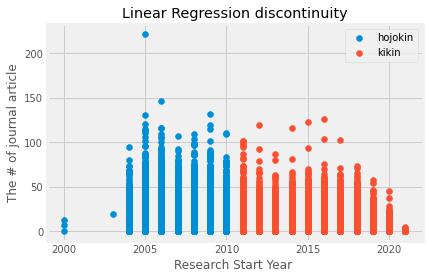

In [160]:
# 必要なライブラリとインポート
import matplotlib.pyplot as plt
# グラフをJupyter上に描画
%matplotlib inline

# 散布図を描画
plt.scatter(df_categoryc[df_categoryc["allocation_niicode"]== 'hojokin']["startfiscalyear"], 
            df_categoryc[df_categoryc["allocation_niicode"]=='hojokin']["journal_freq_count"], label="hojokin")
plt.legend()

plt.scatter(df_categoryc[df_categoryc["allocation_niicode"]=='kikin']["startfiscalyear"], 
            df_categoryc[df_categoryc["allocation_niicode"]=='kikin']["journal_freq_count"], label="kikin")
plt.legend()
plt.xlabel("Research Start Year ")
plt.title('Linear Regression discontinuity')
plt.ylabel("The # of journal article")
plt.show()

In [161]:
df_categoryc['kikin_dummy'] = df_categoryc['allocation_niicode']
df_categoryc['kikin_dummy'] = df_categoryc['kikin_dummy'].replace(['kikin'], 1)
df_categoryc['kikin_dummy'] = df_categoryc['kikin_dummy'].replace(['hojokin'], 0)


In [162]:
# 必要なライブラリをインポート
import statsmodels.api as sm

# データフレームの調整
df_categoryc_rdd = df_categoryc.rename(columns={"kikin_dummy": "D", "journal_freq_count": "Y"})
df_categoryc_rdd["Rc"] = df_categoryc_rdd["startfiscalyear"] - 2010.5
df_categoryc_rdd["Rc*D"] = df_categoryc_rdd["Rc"] * df_categoryc_rdd["D"]
df_categoryc_rdd["Rc2"] = df_categoryc_rdd["Rc"]**2
df_categoryc_rdd["Rc2*D"] = df_categoryc_rdd["Rc2"] * df_categoryc_rdd["D"]

# バンド幅を設定し、条件を満たすサンプルだけを取り出す
h = 3
_df = df_categoryc_rdd[(df_categoryc_rdd["Rc"]>=-h) & (df_categoryc_rdd["Rc"]<=h)]

# 説明変数
X = _df[["D", "Rc", "Rc*D"]]
X = sm.add_constant(X)
# 被説明変数
Y = _df["Y"]

# OLS
model = sm.OLS(Y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1176.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:26:13   Log-Likelihood:            -1.9138e+05
No. Observations:               52989   AIC:                         3.828e+05
Df Residuals:                   52985   BIC:                         3.828e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9882      0.120     66.337      0.0

In [163]:
# 説明変数
X = _df[["D", "Rc", "Rc*D"]]
X = sm.add_constant(X)
# 被説明変数
Y = _df["Y"]

# OLS
model = sm.OLS(Y, X)
result = model.fit()

#print(result.summary())

In [164]:
# 説明変数
X = _df[["D", "Rc", "Rc2"]]
X = sm.add_constant(X)
# 被説明変数
Y = _df["Y"]

# OLS
model = sm.OLS(Y, X)
result = model.fit()

#print(result.summary())

### Method 2

In [165]:
df_categoryc["yearcell"] = df_categoryc["startfiscalyear"]


In [166]:
df_categoryc["yearcell"] -= 2010.5

In [167]:
rdd_df = df_categoryc.assign(threshold=(df_categoryc["yearcell"] > 0).astype(int))
width = 3
rdd_df_width = rdd_df[rdd_df['startfiscalyear'].between( 2010.5 - width, 2010.5 + width)]
rdd_df_width
model = smf.wls("journal_freq_count~yearcell*threshold", rdd_df_width).fit()
print("3year")
model.summary().tables[1]

3year


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.9704,0.121,65.858,0.000,7.733,8.208
yearcell,-1.5213,0.072,-21.191,0.000,-1.662,-1.381
threshold,0.5278,0.163,3.229,0.001,0.207,0.848
yearcell:threshold,0.0450,0.096,0.469,0.639,-0.143,0.233


In [168]:
rdd_df = df_categoryc.assign(threshold=(df_categoryc["yearcell"] > 0).astype(int))
width = 3
rdd_df_width = rdd_df[rdd_df['startfiscalyear'].between( 2010.5 - width, 2010.5 + width)]
rdd_df_width
model = smf.wls("journal_freq_count~yearcell*threshold", rdd_df_width).fit()
print("5year")
model.summary().tables[1]

5year


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.9704,0.121,65.858,0.000,7.733,8.208
yearcell,-1.5213,0.072,-21.191,0.000,-1.662,-1.381
threshold,0.5278,0.163,3.229,0.001,0.207,0.848
yearcell:threshold,0.0450,0.096,0.469,0.639,-0.143,0.233


This model is telling us that mortality increases by 7.6627 points with the consumption of alcohol. Another way of putting this is that alcohol increases the chance of death by all causes by 8% (100*((7.6627+93.6184)/93.6184 - 1)). Notice that this also gives us standard errors for our causal effect estimate. In this case, the effect is statistically significant, since the p-value is below 0.01.



Text(0.5, 1.0, 'Regression Discontinuity')

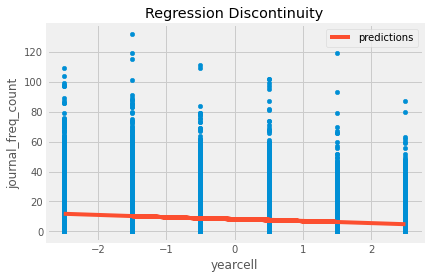

In [169]:
ax = rdd_df_width.plot.scatter(x="yearcell", y="journal_freq_count", color="C0")
rdd_df_width.assign(predictions=model.fittedvalues).plot(x="yearcell", y="predictions", ax=ax, color="C1")

plt.title("Regression Discontinuity")

In [170]:
rdd_df_width

,startfiscalyear,endfiscalyear,category_niicode,directcost,allocation_niicode,len_project,journal_freq_count,jointInt_freq_count,presentation_freq_count,book_freq_count,patent_freq_count,symposium_freq_count,publication_freq_count,kikin_dummy,yearcell,threshold
awardnumber,,,,,,,,,,,,,,,,
17500476,2008.0,2008.0,72.0,3100000.0,hojokin,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0,-2.5,0
17591843,2008.0,2010.0,72.0,3500000.0,hojokin,3.0,20.0,0.0,1.0,1.0,0.0,0.0,0.0,0,-2.5,0
18591003,2008.0,2009.0,72.0,3500000.0,hojokin,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,-2.5,0
19520050,2008.0,2010.0,72.0,3300000.0,hojokin,3.0,6.0,0.0,7.0,2.0,0.0,0.0,0.0,0,-2.5,0
19520215,2008.0,2009.0,72.0,2100000.0,hojokin,2.0,12.0,0.0,14.0,1.0,0.0,0.0,0.0,0,-2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25518016,2013.0,2015.0,72.0,4000000.0,kikin,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1,2.5,1
25518017,2013.0,2018.0,72.0,4000000.0,kikin,6.0,20.0,0.0,12.0,2.0,0.0,1.0,0.0,1,2.5,1
26400156,2013.0,2017.0,72.0,3600000.0,kikin,5.0,4.0,6.0,9.0,0.0,0.0,1.0,0.0,1,2.5,1


Text(0.5, 1.0, 'Regression Discontinuity')

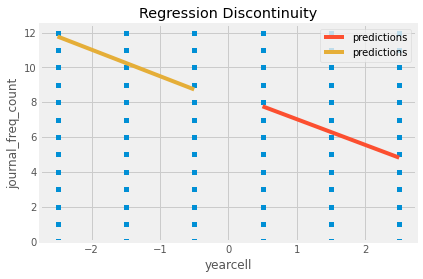

In [171]:
ax = rdd_df_width.plot.scatter(x="yearcell", y="journal_freq_count", color="C0")
rdd_df_width3_kikin = rdd_df_width[rdd_df_width['threshold'] == 1]
rdd_df_width3_hojokin = rdd_df_width[rdd_df_width['threshold'] == 0]

rdd_df_width3_kikin.assign(predictions=model.fittedvalues).plot(x="yearcell", y="predictions", ax=ax, color="C1")
rdd_df_width3_hojokin.assign(predictions=model.fittedvalues).plot(x="yearcell", y="predictions", ax=ax, color = "C2")

plt.ylim(0,12.5)
plt.title("Regression Discontinuity")

In [172]:
rdd_df.threshold.describe()

count    167074.000000
mean          0.755492
std           0.429797
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: threshold, dtype: float64

### Random dataviz

In [175]:
#plt.figure(figsize=(8,6))
#plt.hist(df_hojokin.journal_freq_count/len(df_hojokin.journal_freq_count),bins = 50, alpha=0.5, label="hojokin")
#plt.hist(df_kikin.journal_freq_count/len(df_kikin.journal_freq_count), bins = 50, alpha=0.5, label="kikin")
#plt.xlabel("journal publication", size=14)
#plt.ylabel("Count", size=14)
#plt.title("Multiple Histograms with Matplotlib")
#plt.legend(loc='upper right')
#plt.show()
##plt.savefig("overlapping_histograms_with_matplotlib_Python.png")